In [1]:
import os

# Define the target directory
target_directory = r"C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth"  # change your directory here

# Check if the directory exists
if os.path.exists(target_directory):
    # Change the current working directory
    os.chdir(target_directory)
    print(f"Directory changed to {os.getcwd()}")
else:
    print(f"Directory {target_directory} does not exist.")

Directory changed to C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth


In [2]:
from src.pipeline.paprocessing.run import PAProcessingPipeline

In [3]:
local_mode = True
pipeline = PAProcessingPipeline()

2024-10-27 22:20:26,315 - micro - MainProcess - INFO     Container 'pre-auth' already exists. (blob_helper.py:_create_container_if_not_exists:76)


Template directory resolved to: C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\src\pipeline\paprocessing\templates
Templates found: ['ner_system_prompt.jinja', 'ner_user_prompt.jinja', 'prior_auth_system_prompt.jinja', 'prior_auth_user_prompt.jinja', 'query_expansion_system_prompt.jinja', 'query_expansion_user_prompt.jinja']


In [4]:
uploaded_files = r"C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\001\a"
from src.pipeline.paprocessing.helpers import find_all_files
files = find_all_files(uploaded_files, ["pdf"])

2024-10-27 22:20:26,740 - micro - MainProcess - INFO     Found 4 files with extensions ['pdf'] (helpers.py:find_all_files:32)


In [5]:
await pipeline.run(uploaded_files=files)

2024-10-27 22:20:26,868 - micro - MainProcess - INFO     Uploaded file 'C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\001\a\doctor_notes\01_a_notes.pdf' to blob 'https://testaccountfactoryeastus.blob.core.windows.net/pre-auth/pa_proccesing_runs/12cb4061/raw_uploaded_files/01_a_notes.pdf' in container 'pre-auth'. (run.py:upload_files_to_blob:176)
2024-10-27 22:20:26,914 - micro - MainProcess - INFO     Uploaded file 'C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\001\a\imaging\01_a_imaging.pdf' to blob 'https://testaccountfactoryeastus.blob.core.windows.net/pre-auth/pa_proccesing_runs/12cb4061/raw_uploaded_files/01_a_imaging.pdf' in container 'pre-auth'. (run.py:upload_files_to_blob:176)
2024-10-27 22:20:26,969 - micro - MainProcess - INFO     Uploaded file 'C:\Users\pablosal\Desktop\gbb-ai-hls-factory-prior-auth\utils\data\cases\001\a\labs\01_a_labs.pdf' to blob 'https://testaccountfactoryeastus.blob.core.windows.net/pre-auth/pa_proc

In [8]:
pipeline.results

{'12cb4061': {'raw_uploaded_files': ['https://testaccountfactoryeastus.blob.core.windows.net/pre-auth/pa_proccesing_runs/12cb4061/raw_uploaded_files/01_a_notes.pdf',
   'https://testaccountfactoryeastus.blob.core.windows.net/pre-auth/pa_proccesing_runs/12cb4061/raw_uploaded_files/01_a_imaging.pdf',
   'https://testaccountfactoryeastus.blob.core.windows.net/pre-auth/pa_proccesing_runs/12cb4061/raw_uploaded_files/01_a_labs.pdf',
   'https://testaccountfactoryeastus.blob.core.windows.net/pre-auth/pa_proccesing_runs/12cb4061/raw_uploaded_files/01_a_form.pdf'],
  'processed_images': ['https://testaccountfactoryeastus.blob.core.windows.net/pre-auth/pa_proccesing_runs/12cb4061/processed_images/01_a_form-page-1.png',
   'https://testaccountfactoryeastus.blob.core.windows.net/pre-auth/pa_proccesing_runs/12cb4061/processed_images/01_a_form-page-2.png'],
  'Patient Information': {'Patient Name': 'Sarah Sample',
   'Patient Date of Birth': '10-19-2014',
   'Patient ID': '4567890',
   'Patient Addr

[{'role': 'system',
  'content': '## Role:\nYou are an expert Prior Authorization (PA) specialist with extensive experience in analyzing medical documents and extracting critical information.\n\n## Task:\nYour task is to review and interpret medical documents provided as images, such as prior authorization forms, medical imaging results, lab reports, and doctor notes. Your goal is to extract essential information to make informed decisions regarding Prior Authorization (PA) workflows. You are proficient in handling images from PDFs and ensuring the accuracy and completeness of the extracted data.\n\n## Instructions:\nCarefully analyze the provided images and extract the following information, presenting it in **JSON format** as key-value pairs:\n\n1. **Diagnosis and Medical Justification** (including ICD-10 code)\n2. **Detailed History of Alternative Treatments and Results**\n3. **Relevant Lab Results or Diagnostic Imaging**\n4. **Documented Symptom Severity and Impact on Daily Life**\
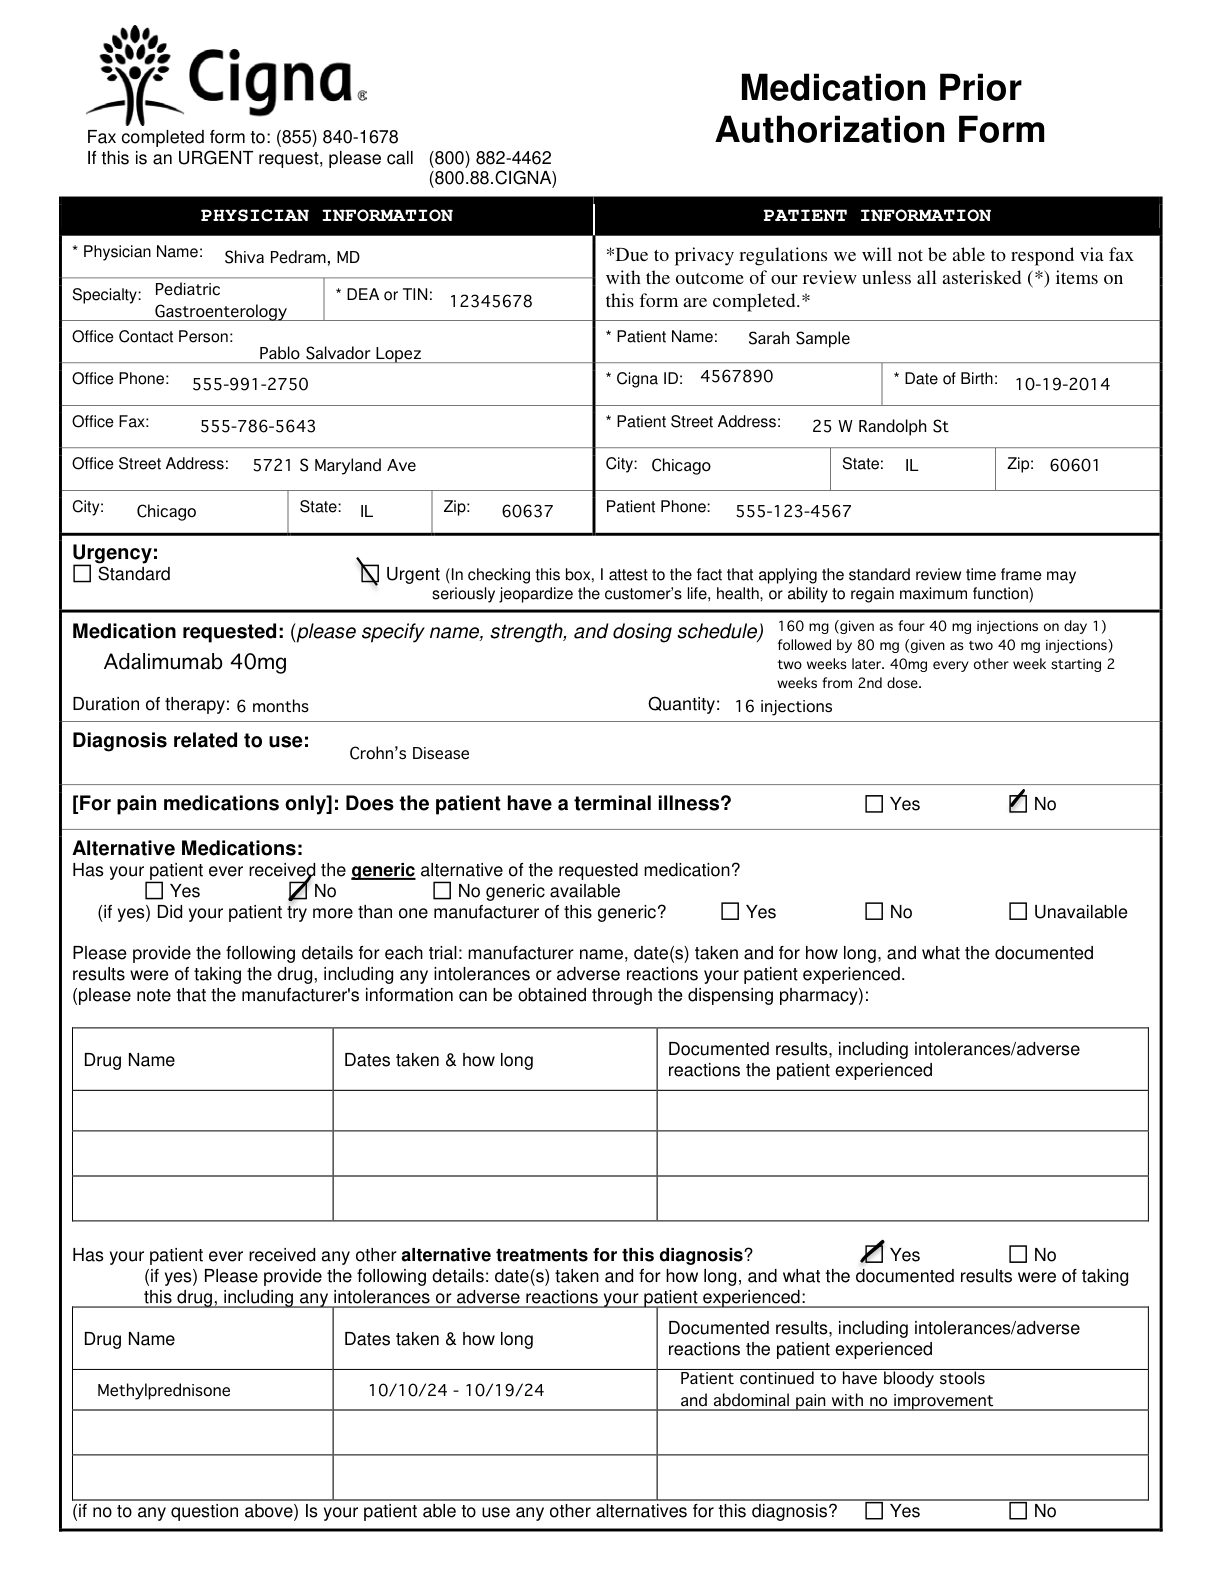
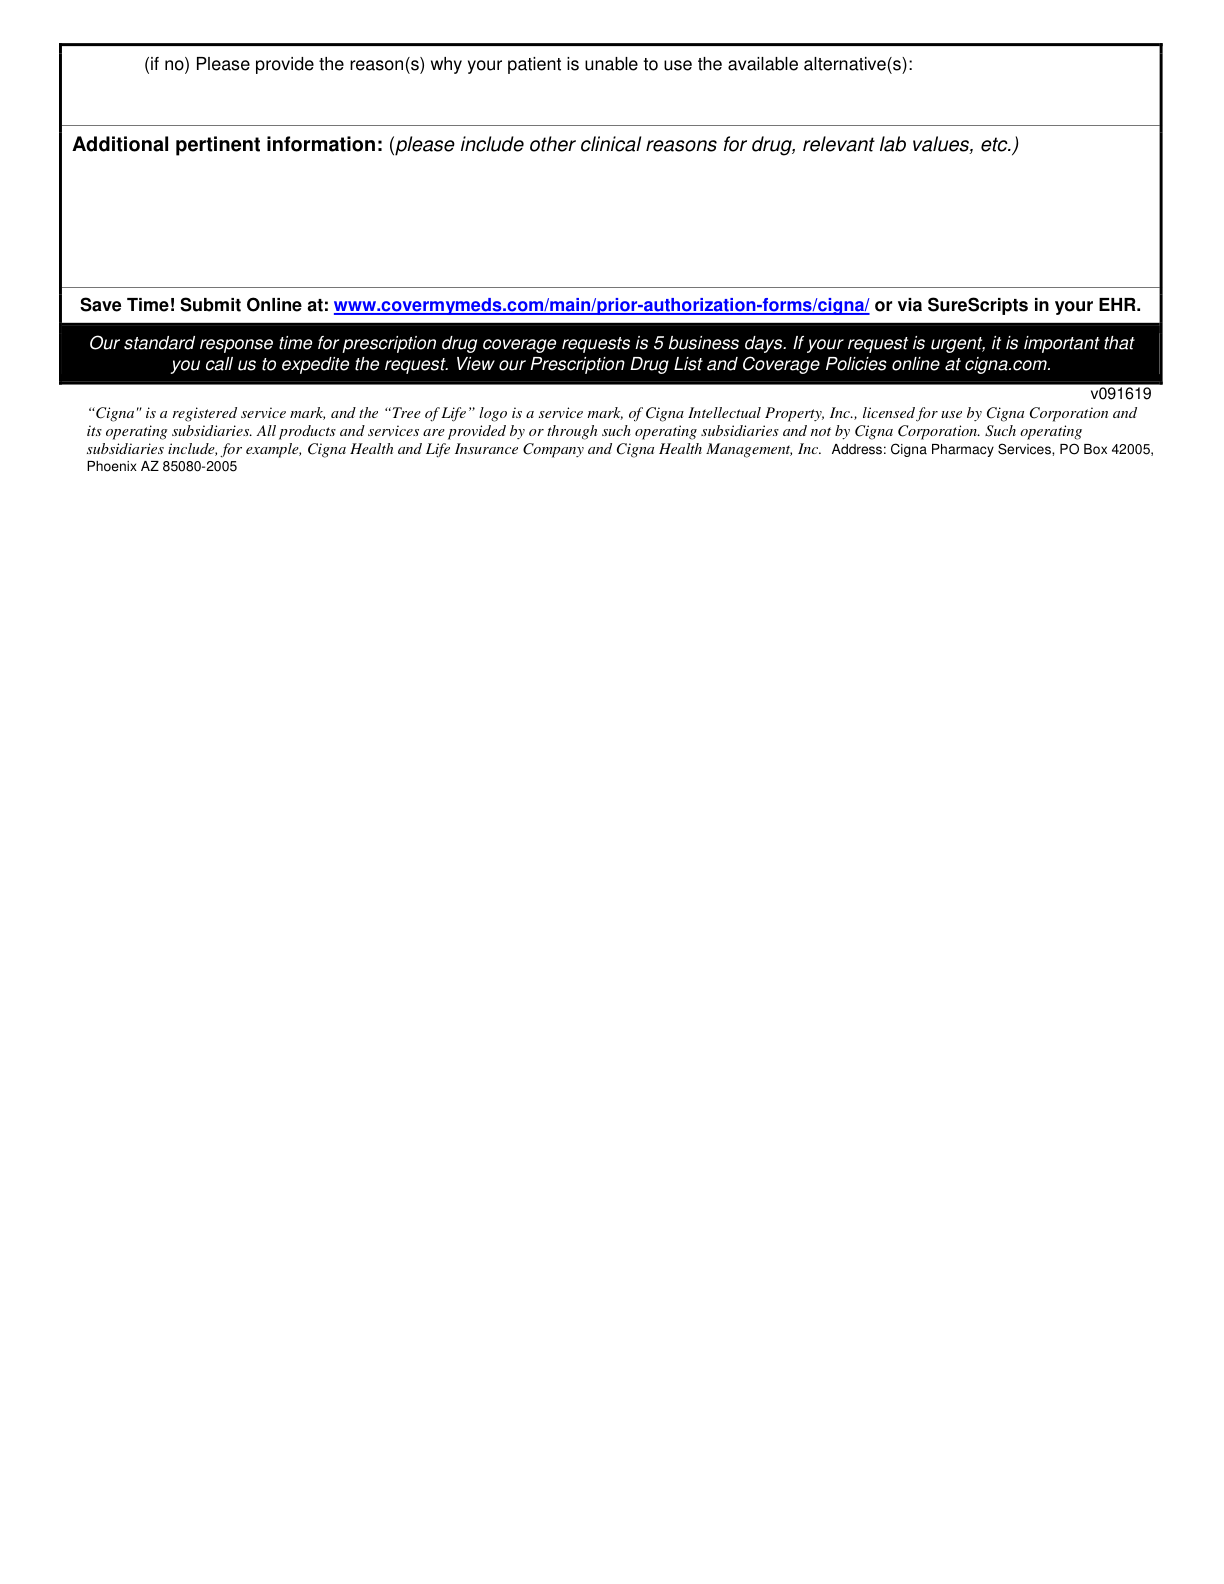
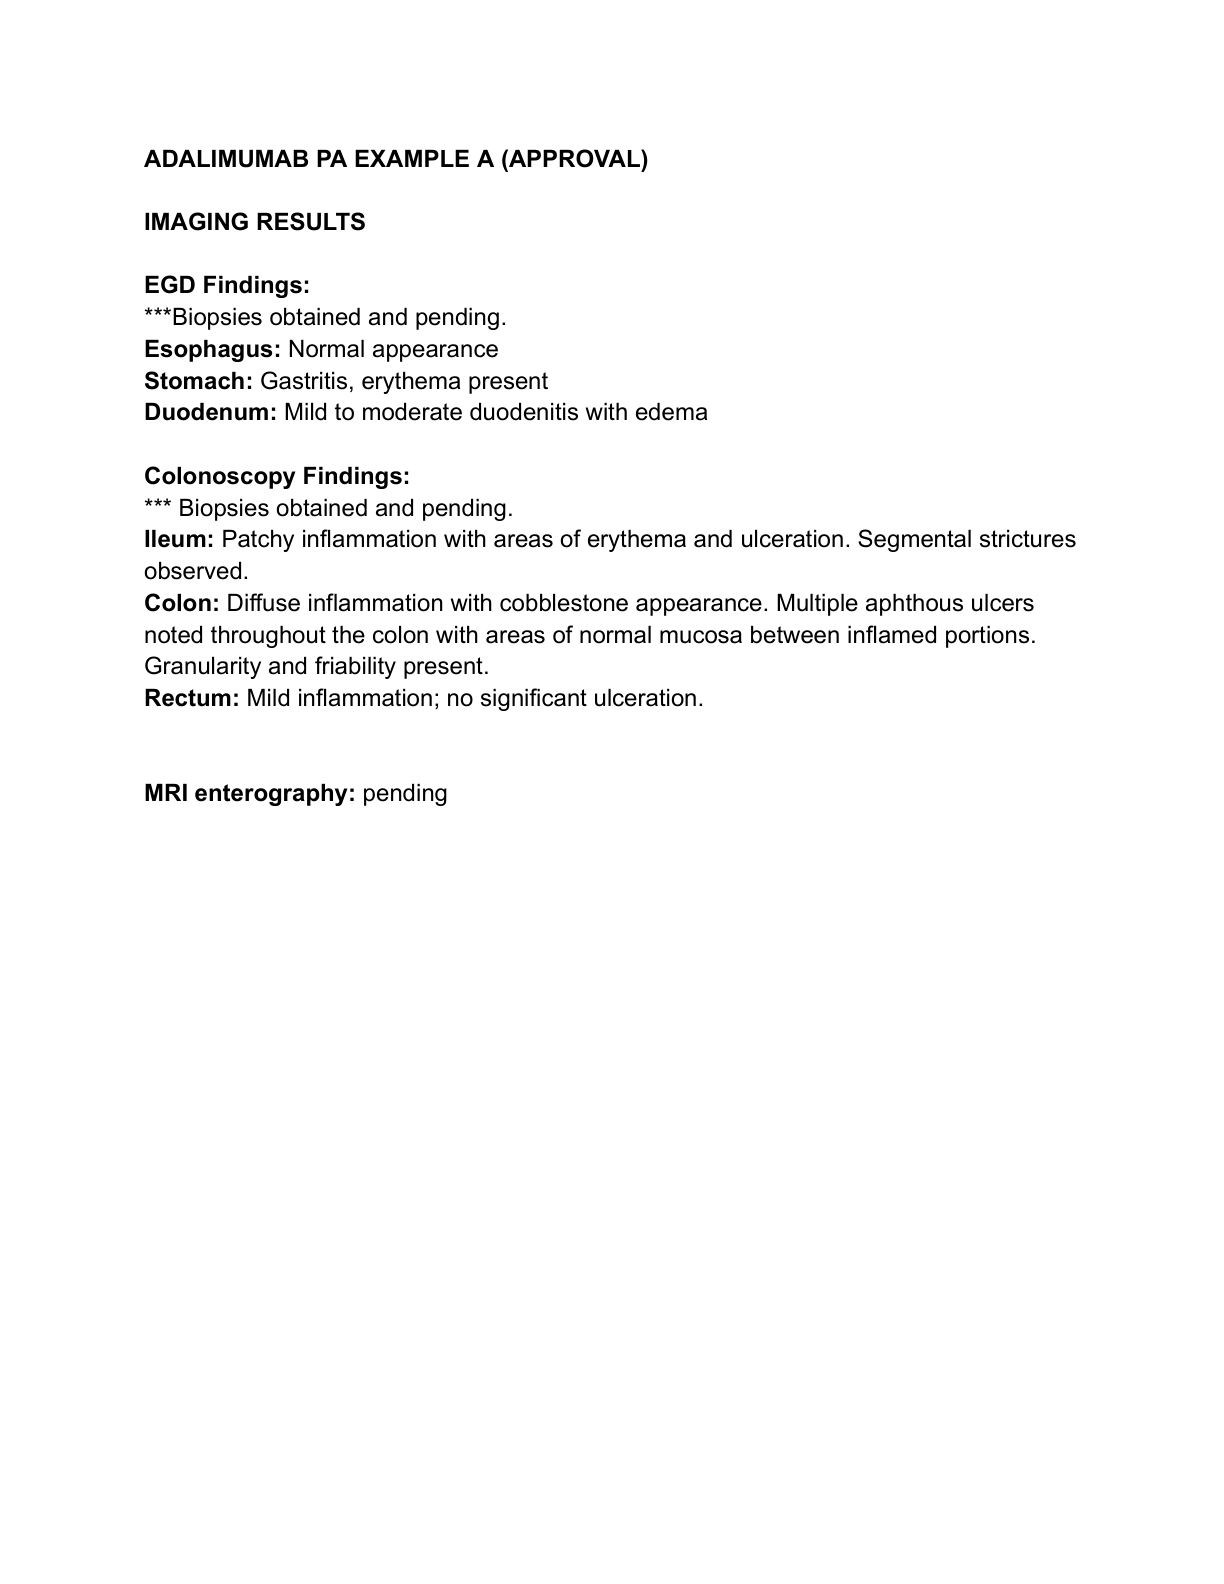
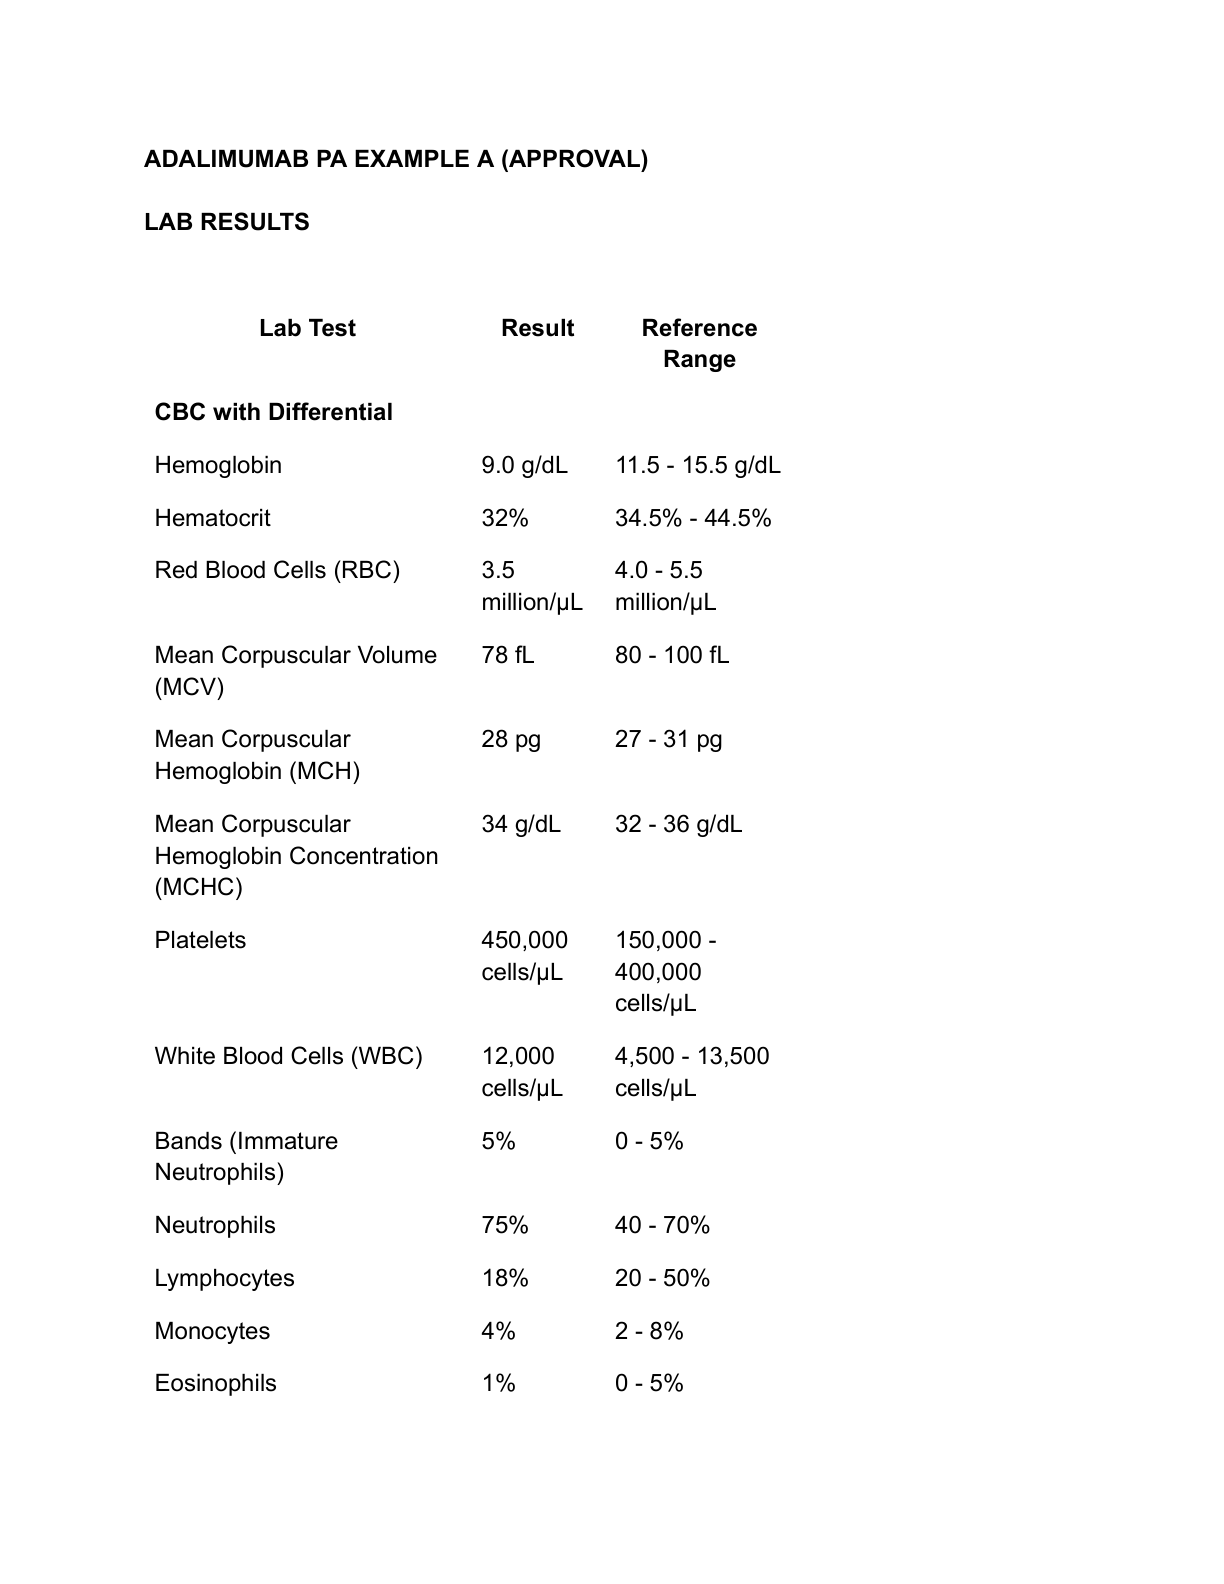
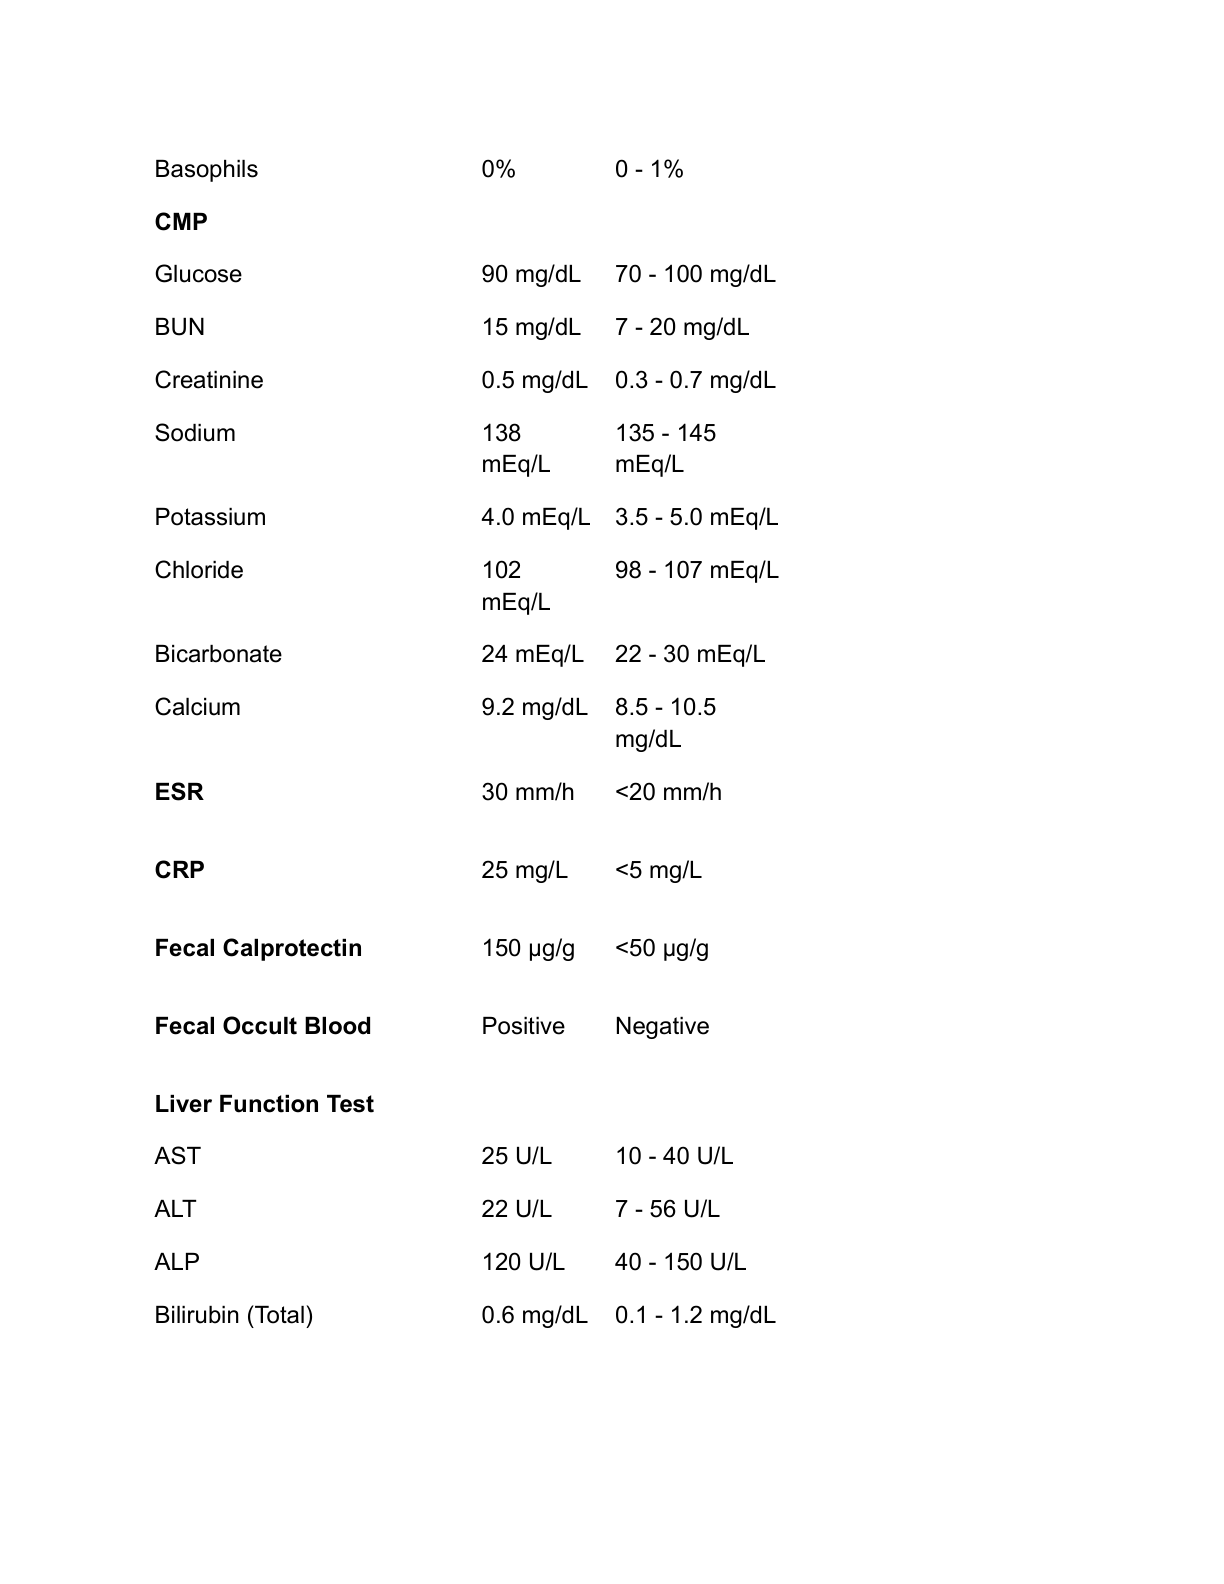
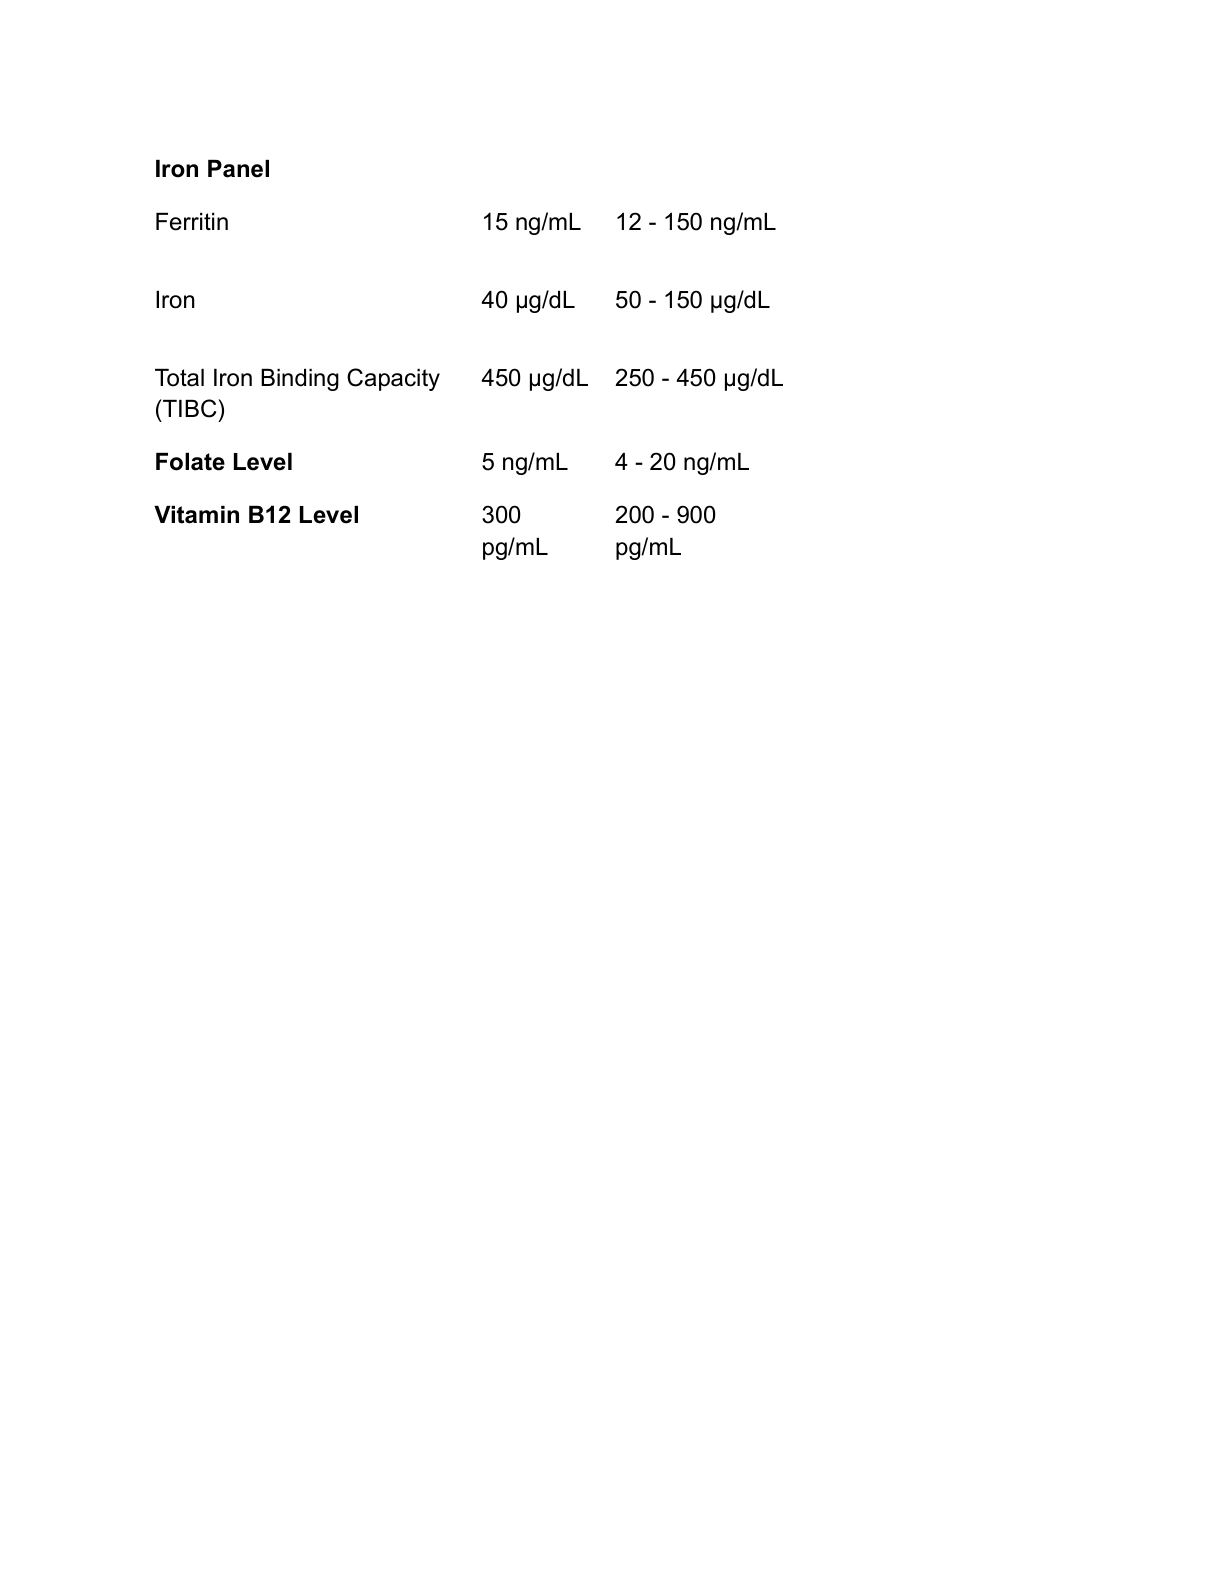
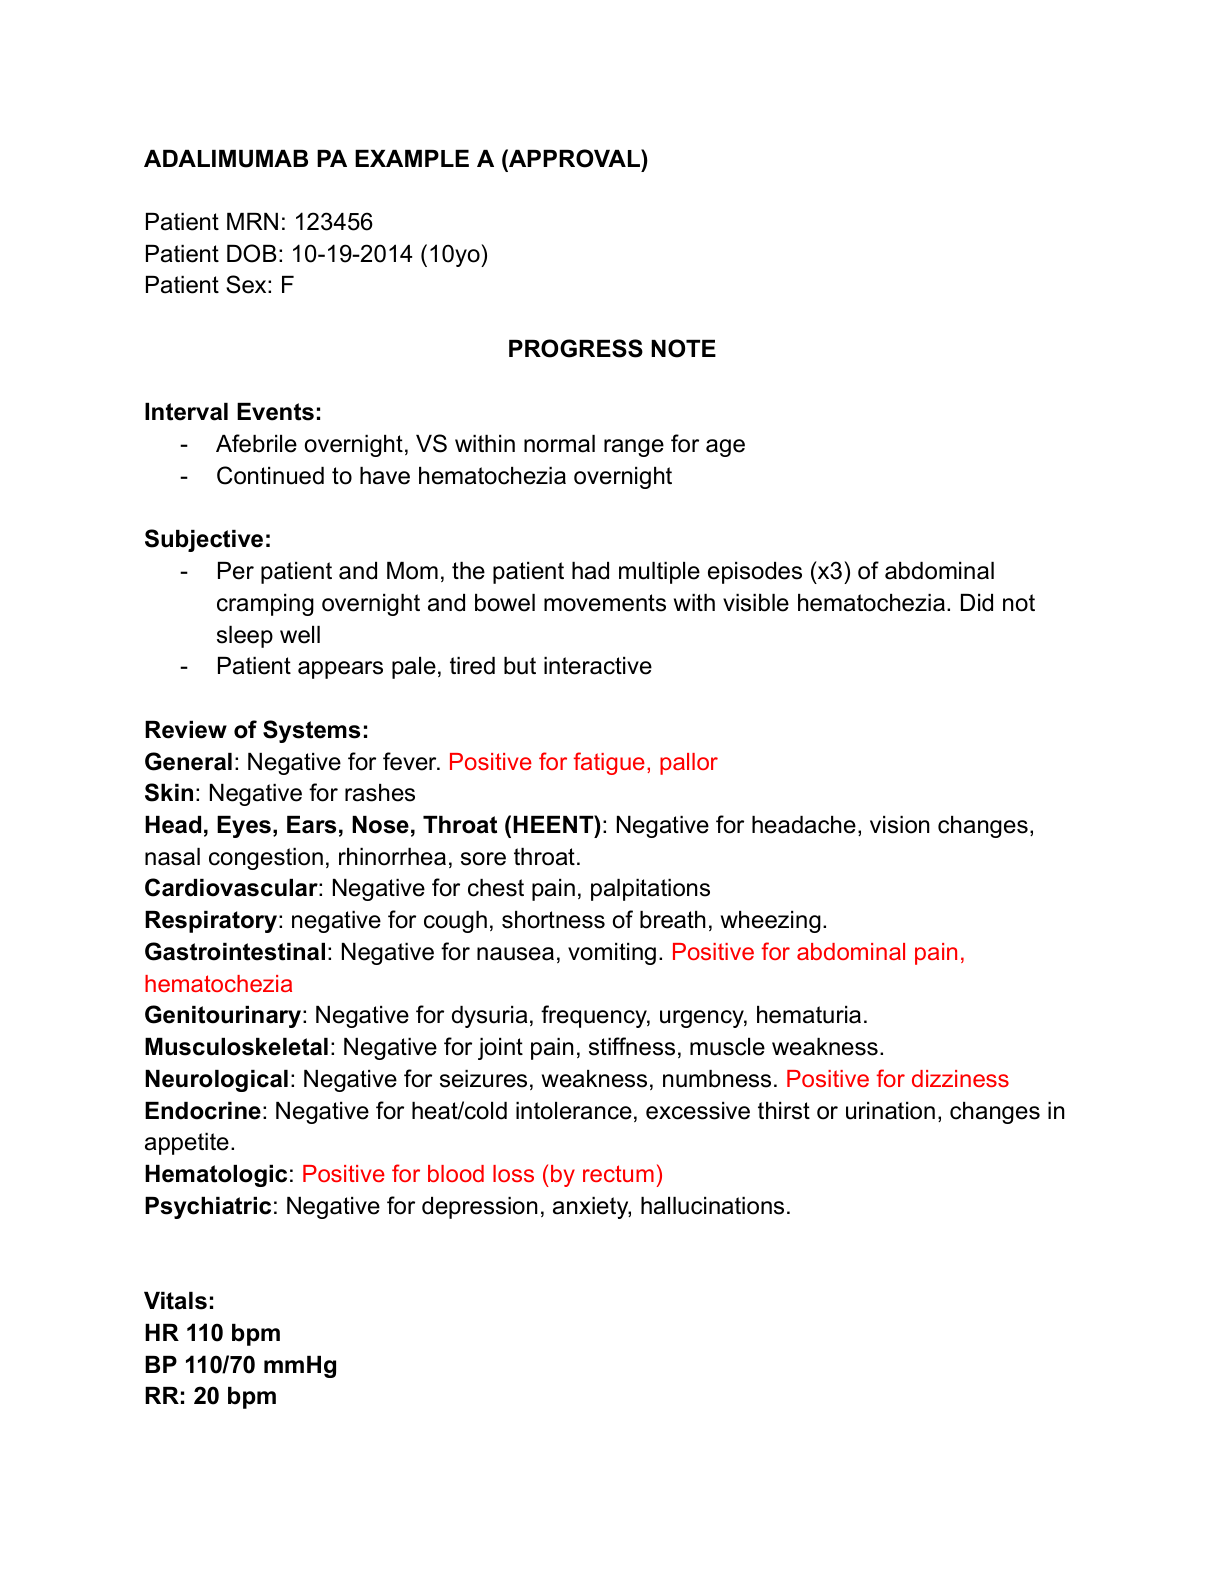
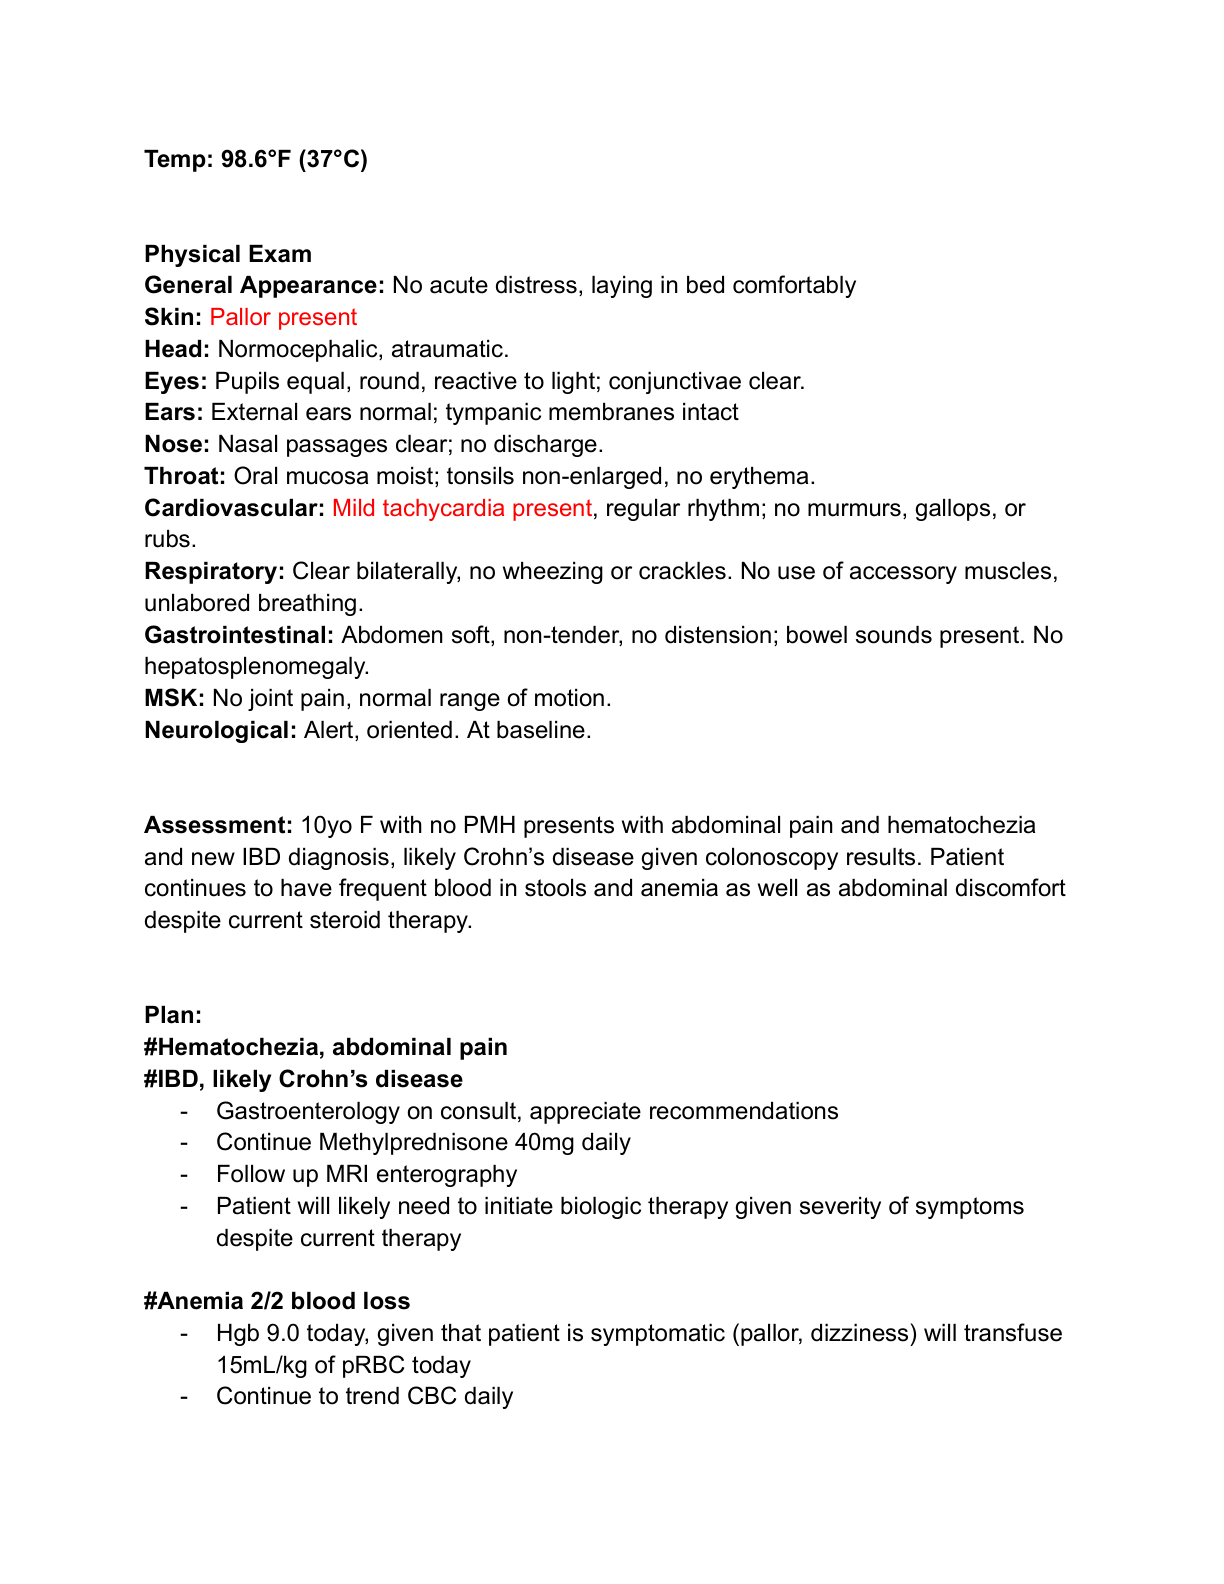
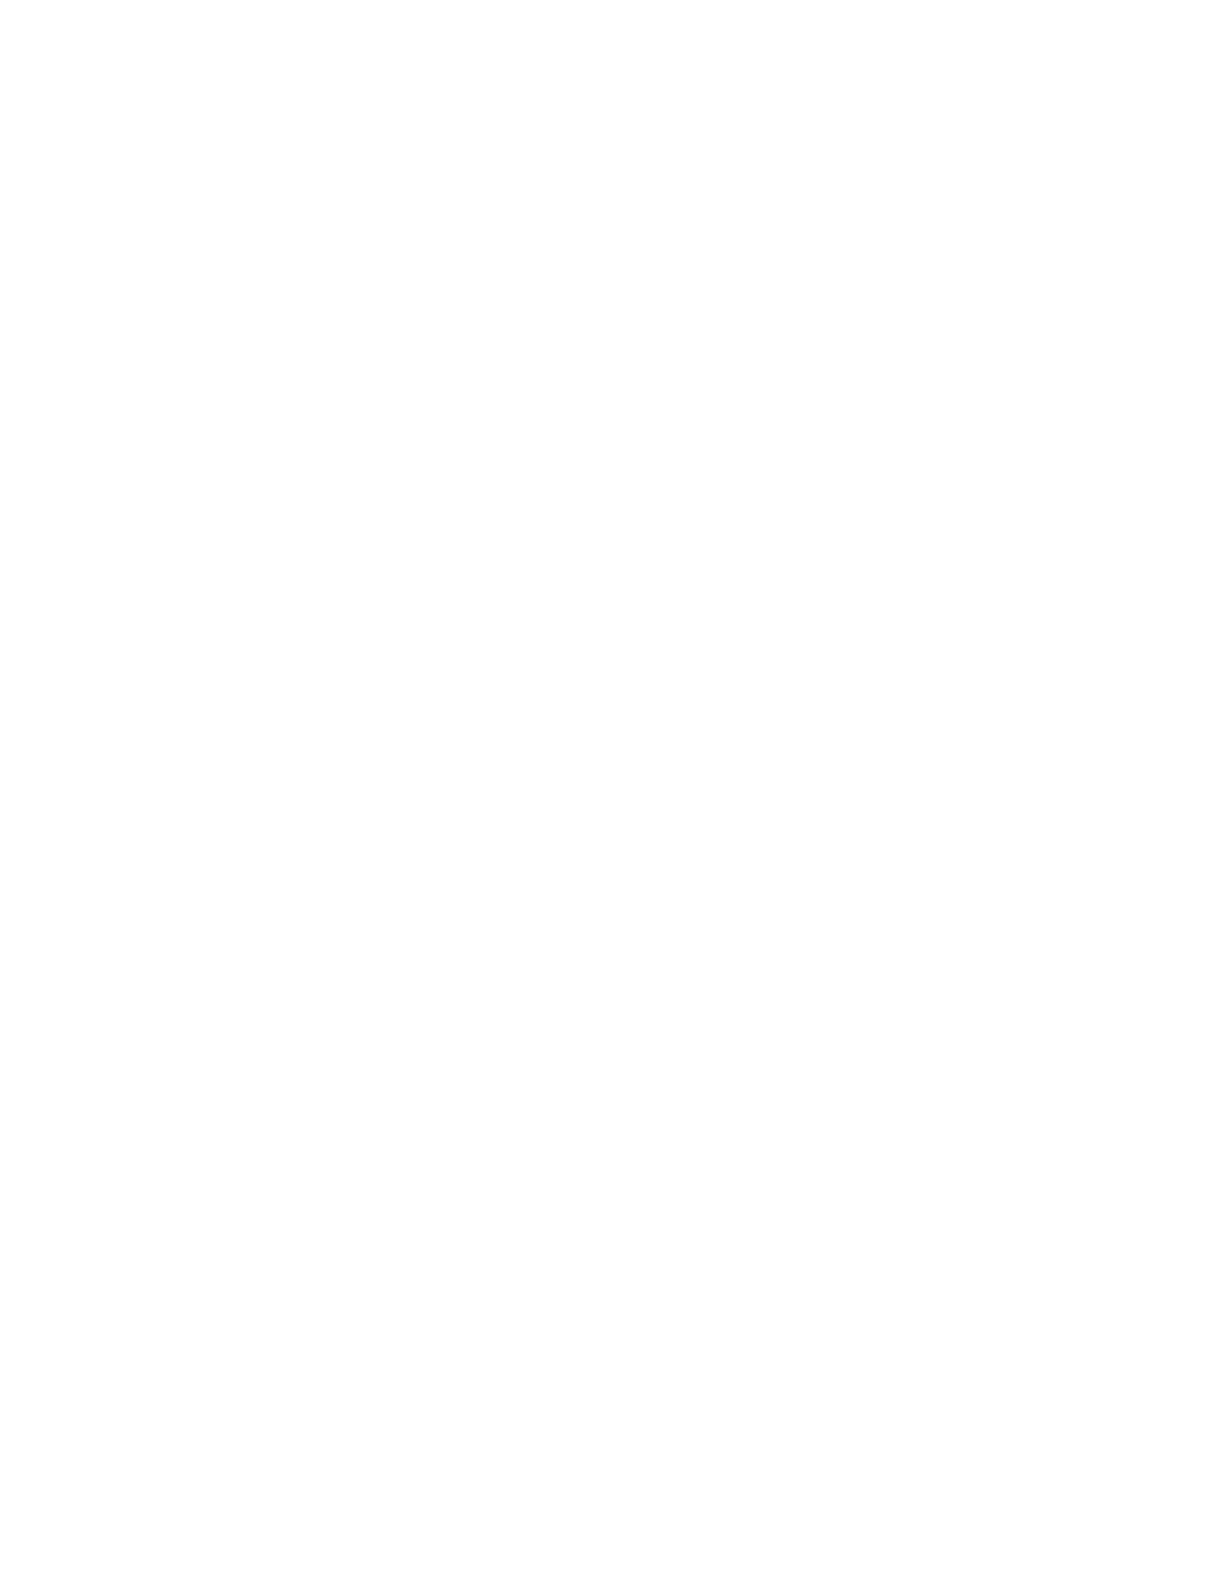

In [9]:
pipeline.conversation_history

In [8]:
!pip install Jinja2